# Data Cleaning
## NYC Open *Big* Data Analysis
Author: Mark Bauer

Objective: Clean data to use for analysis.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p pandas,geopandas,duckdb,urllib.request,seaborn,matplotlib

printing packages and versions:

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas        : 1.5.1
geopandas     : 0.12.1
duckdb        : 1.0.0
urllib.request: 3.11
seaborn       : 0.12.1
matplotlib    : 3.6.2



In [3]:
# list files in directory
%ls

LICENSE              data/                figures/
README.md            data-cleaning.ipynb  log.txt
analysis.ipynb       data-export.ipynb


In [4]:
# list files in data directory
%ls data/

data.csv


In [5]:
df = pd.read_csv('data/data.csv')

print(df.shape)
df.head()

(2551, 17)


,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri
0,fkec-mjr6,"DOHMH Cryptosporidiosis by Race/Ethnicity, Age...",Department of Health and Mental Hygiene (DOHMH),"Cryptosporidiosis, number of cases and annual ...",182,84,4,Health,"['cryptosporidiosis', 'diagnosis year', 'race ...",2024-08-05T14:12:47+0000,2024-08-05T16:34:05+0000,2024-08-05T16:04:46+0000,2024-08-05T16:33:29+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/fkec-mjr6,https://data.cityofnewyork.us/resource/fkec-mjr6
1,mzxg-pwib,New York City Bike Routes,Department of Transportation (DOT),The New York City Department of Transportation...,27673,471,101,NaN,"['nyc bike routes', 'bike routes']",2024-07-24T15:57:31+0000,2024-07-30T00:51:27+0000,2024-07-24T16:06:04+0000,2024-07-30T00:50:54+0000,data.cityofnewyork.us,https://www.nyc.gov/html/dot/html/bicyclists/b...,https://data.cityofnewyork.us/d/mzxg-pwib,https://data.cityofnewyork.us/resource/mzxg-pwib
2,6r9j-qrwz,DSNY Disposal Facilities Used by Year,NYC Department of Sanitation (DSNY),A listing of the facilities used by year to ha...,91,96,7,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:37:24+0000,2024-07-31T19:51:22+0000,2024-07-31T14:21:50+0000,2024-07-31T19:45:38+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/6r9j-qrwz,https://data.cityofnewyork.us/resource/6r9j-qrwz
3,99xv-he3n,DSNY Disposal Sites Used by Facilities by Year,NYC Department of Sanitation (DSNY),A listing of the disposal sites used by each f...,188,71,8,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:18:59+0000,2024-07-31T19:51:26+0000,2024-07-31T14:18:13+0000,2024-07-31T19:44:47+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/99xv-he3n,https://data.cityofnewyork.us/resource/99xv-he3n
4,ufxk-pq9j,Location of Disposal Facilities and Sites Used...,NYC Department of Sanitation (DSNY),The location of the disposal facilities where ...,39,84,17,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T17:54:05+0000,2024-07-31T19:51:24+0000,2024-07-31T14:33:03+0000,2024-07-31T19:45:15+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/ufxk-pq9j,https://data.cityofnewyork.us/resource/ufxk-pq9j


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2551 non-null   object
 1   name               2551 non-null   object
 2   attribution        2425 non-null   object
 3   description        2477 non-null   object
 4   count_rows         2551 non-null   int64 
 5   viewCount          2551 non-null   int64 
 6   downloadCount      2551 non-null   int64 
 7   category           2464 non-null   object
 8   tags               1903 non-null   object
 9   createdAt          2551 non-null   object
 10  updatedAt          2551 non-null   object
 11  dataUpdatedAt      2531 non-null   object
 12  metadataUpdatedAt  2551 non-null   object
 13  domain             2551 non-null   object
 14  attributionLink    358 non-null    object
 15  webUri             2551 non-null   object
 16  dataUri            2551 non-null   object


In [7]:
df.isnull().sum()

id                      0
name                    0
attribution           126
description            74
count_rows              0
viewCount               0
downloadCount           0
category               87
tags                  648
createdAt               0
updatedAt               0
dataUpdatedAt          20
metadataUpdatedAt       0
domain                  0
attributionLink      2193
webUri                  0
dataUri                 0
dtype: int64

In [8]:
df.describe()

,count_rows,viewCount,downloadCount
count,2.551000e+03,2.551000e+03,2.551000e+03
mean,2.338589e+06,1.086398e+04,4.509621e+03
std,1.809700e+07,1.071090e+05,3.969312e+04
min,0.000000e+00,4.900000e+01,4.000000e+00
25%,1.350000e+02,3.615000e+02,3.880000e+02
50%,1.393000e+03,8.220000e+02,7.840000e+02
75%,1.237450e+04,2.536500e+03,2.079000e+03
max,3.764045e+08,2.806198e+06,1.612110e+06


In [9]:
df.describe(include='object')

,id,name,attribution,description,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri
count,2551,2551,2425,2477,2464,1903,2551,2551,2531,2551,2551,358,2551,2551
unique,2551,2544,202,2095,11,1397,2548,1918,2528,1920,1,183,2551,2551
top,fkec-mjr6,Students Receiving Recommended Special Educati...,NYC Department of Education,The Department of Finance (DOF) is required by...,Education,['lifelong learning'],2013-08-22T19:00:41+0000,2022-09-23T19:23:10+0000,2024-08-19T13:01:34+0000,2022-09-23T19:23:10+0000,data.cityofnewyork.us,http://schools.nyc.gov,https://data.cityofnewyork.us/d/fkec-mjr6,https://data.cityofnewyork.us/resource/fkec-mjr6
freq,1,2,472,26,869,26,2,15,2,15,2551,38,1,1


In [10]:
df.loc[df['attribution'].isnull()].head()

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri
187,hgx4-8ukb,Zoning Application Portal (ZAP) - Project Data,NaN,The Department of City Planning (DCP) processe...,32601,1142,279,City Government,"['zap', 'zoning application portal', 'land use...",2022-08-17T14:27:25+0000,2024-08-19T07:01:22+0000,2024-08-19T07:01:29+0000,2024-08-19T07:01:22+0000,data.cityofnewyork.us,https://zap.planning.nyc.gov/projects,https://data.cityofnewyork.us/d/hgx4-8ukb,https://data.cityofnewyork.us/resource/hgx4-8ukb
240,bbtf-6p3c,Schoolyard to Playgrounds,NaN,The Schoolyards to Playgrounds initiative bega...,285,752,445,NaN,NaN,2022-04-01T14:29:49+0000,2024-08-14T13:24:42+0000,2024-08-14T13:24:43+0000,2024-08-14T13:24:42+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/bbtf-6p3c,https://data.cityofnewyork.us/resource/bbtf-6p3c
241,mk9u-qu7i,Greenstreets,NaN,"Launched in 1996, the Greenstreets program beg...",2753,1247,528,NaN,NaN,2022-03-31T22:05:41+0000,2024-08-14T13:49:57+0000,2024-08-14T13:50:01+0000,2024-08-14T13:49:57+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/mk9u-qu7i,https://data.cityofnewyork.us/resource/mk9u-qu7i
242,uwmn-v7un,Golf Courses,NaN,This dataset consists of golf courses under th...,19,512,440,NaN,NaN,2022-03-31T21:55:29+0000,2024-08-14T13:49:34+0000,2024-08-14T13:49:35+0000,2024-08-14T13:49:34+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/uwmn-v7un,https://data.cityofnewyork.us/resource/uwmn-v7un
243,ijwa-mn2v,Beaches,NaN,Larger beach properties are typically divided ...,175,650,353,NaN,NaN,2022-03-31T21:38:39+0000,2024-08-14T13:49:22+0000,2024-08-14T13:49:22+0000,2024-08-14T13:49:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/ijwa-mn2v,https://data.cityofnewyork.us/resource/ijwa-mn2v


In [11]:
df['full_name'] = df['name'] + "\n" + df['attribution'].fillna("N/A")

df['full_name'].head()

0    DOHMH Cryptosporidiosis by Race/Ethnicity, Age...
1    New York City Bike Routes\nDepartment of Trans...
2    DSNY Disposal Facilities Used by Year\nNYC Dep...
3    DSNY Disposal Sites Used by Facilities by Year...
4    Location of Disposal Facilities and Sites Used...
Name: full_name, dtype: object

# Largest Datasets on NYC Open Data

## Largest dataset

In [12]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(1)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,full_name
1928,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1854,504,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,DSNY - PlowNYC Data\nDepartment of Sanitation ...


In [13]:
description = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, 'description']
    .values[0]
)

print(description)

A table containing physical ID (a unique street segment identifier) and the date/time with which it was last associated with a GPS signal emitted by a NYC Department of Sanitation (DSNY) snow clearing vehicle. The PlowNYC website (https://plownyc.cityofnewyork.us/plownyc/) allows you to track the progress of DSNY snow removal vehicles. To learn more about DSNY’s Snow Response, visit: https://www.nyc.gov/site/dsny/what-we-do/snow-response.page.


In [14]:
counts = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, ['count_rows', 'viewCount', 'downloadCount']]
    .T
    .style.hide(axis="columns")

)

counts

count_rows,376404531
viewCount,1854
downloadCount,504


In [15]:
# generate table for README

print_df = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, [
        'id', 'name', 'attribution',
        'count_rows', 'viewCount', 'downloadCount'
    ]]
)
    
print(print_df.to_markdown(index=False))

| id        | name                | attribution                     |   count_rows |   viewCount |   downloadCount |
|:----------|:--------------------|:--------------------------------|-------------:|------------:|----------------:|
| rmhc-afj9 | DSNY - PlowNYC Data | Department of Sanitation (DSNY) |    376404531 |        1854 |             504 |


## Top 20 Largest Datasets

In [16]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,full_name
1928,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1854,504,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,DSNY - PlowNYC Data\nDepartment of Sanitation ...
1423,am94-epxh,2018 For Hire Vehicles Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,260766056,3140,1005,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-09-17T20:40:48+0000,2023-12-15T15:05:40+0000,2019-04-17T18:58:46+0000,2023-12-15T15:05:40+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/am94-epxh,https://data.cityofnewyork.us/resource/am94-epxh,2018 For Hire Vehicles Trip Data\nTaxi and Lim...
986,4p5c-cbgn,2019 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),NaN,234629119,3676,1410,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2019-09-20T14:15:36+0000,2023-12-15T16:10:36+0000,2020-03-06T19:30:26+0000,2023-12-15T16:10:36+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/4p5c-cbgn,https://data.cityofnewyork.us/resource/4p5c-cbgn,2019 High Volume FHV Trip Records\nTaxi and Li...
8,u253-aew4,2023 High Volume FHV Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,232490020,219,20,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2024-07-02T13:34:52+0000,2024-07-16T18:41:11+0000,2024-07-15T17:29:03+0000,2024-07-16T18:40:12+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/u253-aew4,https://data.cityofnewyork.us/resource/u253-aew4,2023 High Volume FHV Trip Data\nTaxi and Limou...
88,g6pj-fsah,2022 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,212416083,1164,479,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-11-01T15:11:25+0000,2023-12-15T15:59:25+0000,2023-11-08T14:43:26+0000,2023-12-15T15:53:18+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/g6pj-fsah,https://data.cityofnewyork.us/resource/g6pj-fsah,2022 High Volume FHV Trip Records\nTaxi and Li...
1612,avz8-mqzz,2017 For Hire Vehicle Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,200283593,3867,1014,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-03-08T21:15:31+0000,2023-12-15T15:01:45+0000,2018-10-22T16:11:25+0000,2023-12-15T15:01:45+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/avz8-mqzz,https://data.cityofnewyork.us/resource/avz8-mqzz,2017 For Hire Vehicle Trip Data\nTaxi and Limo...
95,5ufr-wvc5,2021 High Volume FHV Trip Records,Department of Transportation (DOT),These records are generated from the trip reco...,174596652,389,197,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-10-25T15:18:34+0000,2023-12-15T15:59:23+0000,2023-10-31T11:46:29+0000,2023-12-15T15:58:59+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/5ufr-wvc5,https://data.cityofnewyork.us/resource/5ufr-wvc5,2021 High Volume FHV Trip Records\nDepartment ...
2087,t7ny-aygi,2013 Yellow Taxi Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,173179759,1213,349,Transportation,"['yellow taxi', 'trip data', 'fhv', 'trip', 'b...",2015

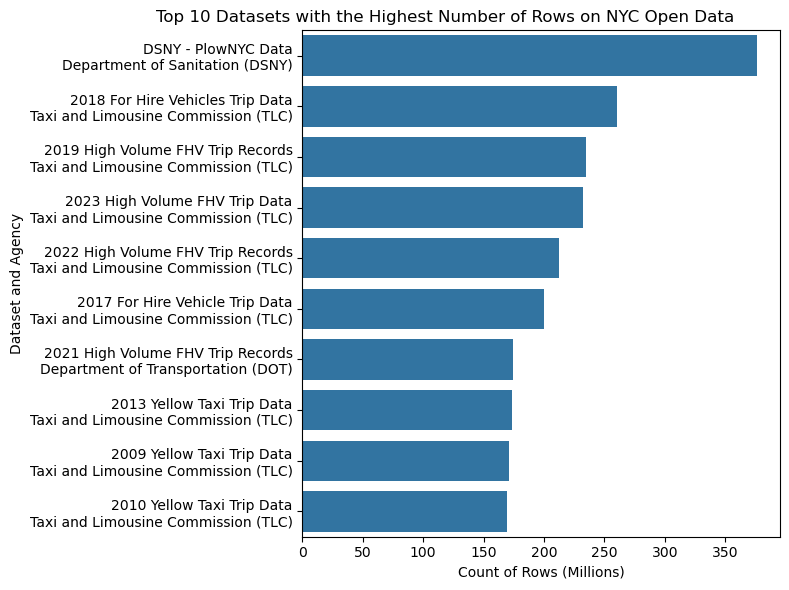

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

top_20 = (
    df
    .sort_values(by='count_rows', ascending=False)
    .loc[:, ['full_name', 'count_rows']]
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)

sns.barplot(
    data=top_20, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data',
    fontsize=12, x=.3
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-datasets.png', dpi=250, bbox_inches='tight')

In [18]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
 .groupby(by=['category'])['id']
 .count()
 .sort_values(ascending=False)
)

category
Transportation     18
City Government     2
Name: id, dtype: int64

In [19]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
 .groupby(by=['attribution'])['id']
 .count()
 .sort_values(ascending=False)
)

attribution
Taxi and Limousine Commission (TLC)    17
Department of Finance (DOF)             1
Department of Sanitation (DSNY)         1
Department of Transportation (DOT)      1
Name: id, dtype: int64

## Top 20 Largest Datasets Filtering Out Taxi Car Data

In [20]:
# exclude these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

(df
 .loc[~df['name'].str.contains('|'.join(taxi_car_data))]
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,full_name
1928,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1854,504,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,DSNY - PlowNYC Data\nDepartment of Sanitation ...
2050,nc67-uf89,Open Parking and Camera Violations,Department of Finance (DOF),The Open Parking and Camera Violations dataset...,117062807,240720,37211,City Government,"['dof', 'parking', 'summons', 'violation']",2016-01-04T16:08:38+0000,2024-03-15T17:35:08+0000,2024-08-18T02:03:08+0000,2024-03-15T17:35:08+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/nc67-uf89,https://data.cityofnewyork.us/resource/nc67-uf89,Open Parking and Camera Violations\nDepartment...
733,4fwc-j3vn,Weigh in Motion,NaN,A Weigh In Motion (WIM) system is designed to ...,97698569,1878,1298,Transportation,"['wim', 'weigh in motion', 'trucks', 'overweig...",2020-10-21T14:56:39+0000,2024-06-26T19:00:12+0000,2024-06-27T09:35:08+0000,2024-06-26T19:00:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/4fwc-j3vn,https://data.cityofnewyork.us/resource/4fwc-j3vn,Weigh in Motion\nN/A
1997,wewp-mm3p,311 Call Center Inquiry,311,<b>Please note: Due to pandemic call handling ...,97046151,11078,23277,City Government,NaN,2016-05-12T22:58:27+0000,2024-01-24T21:32:54+0000,2024-08-19T01:04:20+0000,2024-01-24T21:32:54+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/wewp-mm3p,https://data.cityofnewyork.us/resource/wewp-mm3p,311 Call Center Inquiry\n311
1874,i4gi-tjb9,DOT Traffic Speeds NBE,NaN,NaN,85740225,18617,6113,Transportation,NaN,2017-04-17T18:31:04+0000,2020-02-08T00:40:14+0000,2024-08-19T19:17:59+0000,2020-02-08T00:40:14+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/i4gi-tjb9,https://data.cityofnewyork.us/resource/i4gi-tjb9,DOT Traffic Speeds NBE\nN/A
844,2nwg-uqyg,Emergency Department Visits and Admissions for...,Department of Health and Mental Hygiene (DOHMH),"Total emergency department visits, and visits ...",82021561,12665,2293,Health,"['emergency', 'emergency department', 'influen...",2020-04-28T18:50:14+0000,2023-01-19T17:00:22+0000,2022-12-05T19:34:43+0000,2023-01-19T17:00:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/2nwg-uqyg,https://data.cityofnewyork.us/resource/2nwg-uqyg,Emergency Department Visits and Admissions for...
1282,pbk5-6r7z,Street Construction Permits - Stipulations (Hi...,Department of Transportation (DOT),DOT issues over 150 different types of sidewal...,79933031,1517,891,Transportation,"['permit', 'street work', 'construction', 'cut...",2018-12-28T18:26:04+0000,2022-05-09T22:26:50+0000,2020-04-13T19:19:40+0000,2022-05-09T22:26:50+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/pbk5-6r7z,https://data.cityofnewyork.us/resource/pbk5-6r7z,Street Construction Permits - Stipulations (Hi...
1020,scjx-j6np,DOF: Property Charges Balance,Department of Finance,Property related charge information by period.,75863671,6804,1148,City Government,"['charge balance', 'open balance', 'charge sum...",2019-07-16T18:49:01+0000,2024-06-06T18:59:51+0000,2024-06-06T19:22:43+0000,2024-06-06T18:59:51+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/scjx-j6np,https://data.cityofnewyork.us/resource/scjx-j6np,DOF: Property Charges Balance\nDepartment of F...
1356,quxm-hmyr,LinkNYC Kiosk Status (Historical),Office of Technology and Innovation (OTI),This dataset provides the most current listing...,65675385,3312,1883,City Government,"['linknyc kiosk status', 'wifi', 'wi-fi', 'bro...",2018-11-20T20:36:32+0000,2023-06-08T13:48:56+0000,2023-0

In [21]:
# string is too long, we need to format it better
formatted_dataset = 'Emergency Department Visits and Admissions for\n\
Influenza-like Illness and/or Pneumonia\nDepartment of Health and Mental Hygiene (DOHMH)'

df.loc[df['id'] == '2nwg-uqyg', ['full_name']] = formatted_dataset

df.loc[df['id'] == '2nwg-uqyg', 'full_name'].values[0]

'Emergency Department Visits and Admissions for\nInfluenza-like Illness and/or Pneumonia\nDepartment of Health and Mental Hygiene (DOHMH)'

In [22]:
(df
.loc[~df['name'].str.contains('|'.join(taxi_car_data))]
.sort_values(by='count_rows', ascending=False)
.head(10)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,full_name
1928,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1854,504,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,DSNY - PlowNYC Data\nDepartment of Sanitation ...
2050,nc67-uf89,Open Parking and Camera Violations,Department of Finance (DOF),The Open Parking and Camera Violations dataset...,117062807,240720,37211,City Government,"['dof', 'parking', 'summons', 'violation']",2016-01-04T16:08:38+0000,2024-03-15T17:35:08+0000,2024-08-18T02:03:08+0000,2024-03-15T17:35:08+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/nc67-uf89,https://data.cityofnewyork.us/resource/nc67-uf89,Open Parking and Camera Violations\nDepartment...
733,4fwc-j3vn,Weigh in Motion,NaN,A Weigh In Motion (WIM) system is designed to ...,97698569,1878,1298,Transportation,"['wim', 'weigh in motion', 'trucks', 'overweig...",2020-10-21T14:56:39+0000,2024-06-26T19:00:12+0000,2024-06-27T09:35:08+0000,2024-06-26T19:00:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/4fwc-j3vn,https://data.cityofnewyork.us/resource/4fwc-j3vn,Weigh in Motion\nN/A
1997,wewp-mm3p,311 Call Center Inquiry,311,<b>Please note: Due to pandemic call handling ...,97046151,11078,23277,City Government,NaN,2016-05-12T22:58:27+0000,2024-01-24T21:32:54+0000,2024-08-19T01:04:20+0000,2024-01-24T21:32:54+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/wewp-mm3p,https://data.cityofnewyork.us/resource/wewp-mm3p,311 Call Center Inquiry\n311
1874,i4gi-tjb9,DOT Traffic Speeds NBE,NaN,NaN,85740225,18617,6113,Transportation,NaN,2017-04-17T18:31:04+0000,2020-02-08T00:40:14+0000,2024-08-19T19:17:59+0000,2020-02-08T00:40:14+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/i4gi-tjb9,https://data.cityofnewyork.us/resource/i4gi-tjb9,DOT Traffic Speeds NBE\nN/A
844,2nwg-uqyg,Emergency Department Visits and Admissions for...,Department of Health and Mental Hygiene (DOHMH),"Total emergency department visits, and visits ...",82021561,12665,2293,Health,"['emergency', 'emergency department', 'influen...",2020-04-28T18:50:14+0000,2023-01-19T17:00:22+0000,2022-12-05T19:34:43+0000,2023-01-19T17:00:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/2nwg-uqyg,https://data.cityofnewyork.us/resource/2nwg-uqyg,Emergency Department Visits and Admissions for...
1282,pbk5-6r7z,Street Construction Permits - Stipulations (Hi...,Department of Transportation (DOT),DOT issues over 150 different types of sidewal...,79933031,1517,891,Transportation,"['permit', 'street work', 'construction', 'cut...",2018-12-28T18:26:04+0000,2022-05-09T22:26:50+0000,2020-04-13T19:19:40+0000,2022-05-09T22:26:50+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/pbk5-6r7z,https://data.cityofnewyork.us/resource/pbk5-6r7z,Street Construction Permits - Stipulations (Hi...
1020,scjx-j6np,DOF: Property Charges Balance,Department of Finance,Property related charge information by period.,75863671,6804,1148,City Government,"['charge balance', 'open balance', 'charge sum...",2019-07-16T18:49:01+0000,2024-06-06T18:59:51+0000,2024-06-06T19:22:43+0000,2024-06-06T18:59:51+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/scjx-j6np,https://data.cityofnewyork.us/resource/scjx-j6np,DOF: Property Charges Balance\nDepartment of F...
1356,quxm-hmyr,LinkNYC Kiosk Status (Historical),Office of Technology and Innovation (OTI),This dataset provides the most current listing...,65675385,3312,1883,City Government,"['linknyc kiosk status', 'wifi', 'wi-fi', 'bro...",2018-11-20T20:36:32+0000,2023-06-08T13:48:56+0000,2023-0

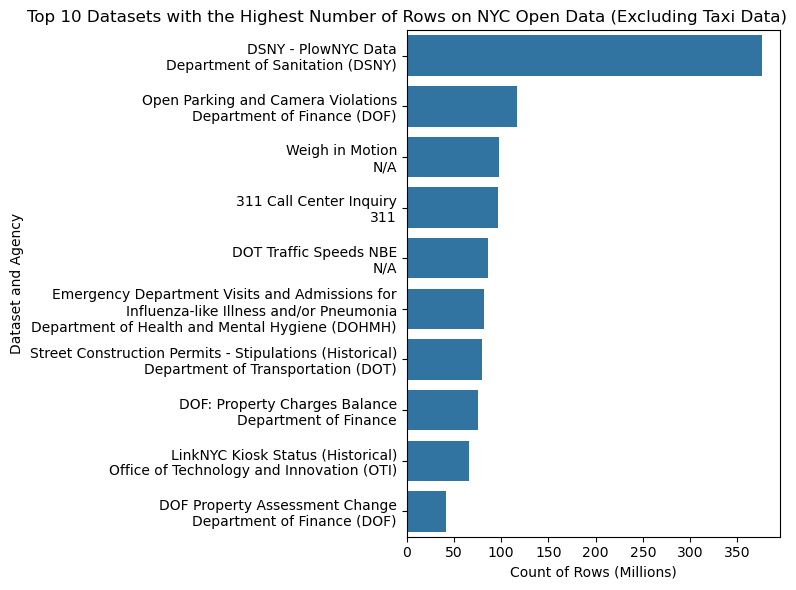

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# exclude these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

data = (
    df
    .loc[~df['name'].str.contains('|'.join(taxi_car_data)), ['full_name', 'count_rows']]
    .sort_values(by='count_rows', ascending=False)
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)

sns.barplot(
    data=data, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data (Excluding Taxi Data)',
    fontsize=12, x=.0
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-no-taxi.png', dpi=250, bbox_inches='tight')

## Top 20 Largest Datasets with Taxi Car Data

In [24]:
# include these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

(df
 .loc[df['name'].str.contains('|'.join(taxi_car_data))]
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,full_name
1423,am94-epxh,2018 For Hire Vehicles Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,260766056,3140,1005,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-09-17T20:40:48+0000,2023-12-15T15:05:40+0000,2019-04-17T18:58:46+0000,2023-12-15T15:05:40+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/am94-epxh,https://data.cityofnewyork.us/resource/am94-epxh,2018 For Hire Vehicles Trip Data\nTaxi and Lim...
986,4p5c-cbgn,2019 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),NaN,234629119,3676,1410,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2019-09-20T14:15:36+0000,2023-12-15T16:10:36+0000,2020-03-06T19:30:26+0000,2023-12-15T16:10:36+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/4p5c-cbgn,https://data.cityofnewyork.us/resource/4p5c-cbgn,2019 High Volume FHV Trip Records\nTaxi and Li...
8,u253-aew4,2023 High Volume FHV Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,232490020,219,20,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2024-07-02T13:34:52+0000,2024-07-16T18:41:11+0000,2024-07-15T17:29:03+0000,2024-07-16T18:40:12+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/u253-aew4,https://data.cityofnewyork.us/resource/u253-aew4,2023 High Volume FHV Trip Data\nTaxi and Limou...
88,g6pj-fsah,2022 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,212416083,1164,479,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-11-01T15:11:25+0000,2023-12-15T15:59:25+0000,2023-11-08T14:43:26+0000,2023-12-15T15:53:18+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/g6pj-fsah,https://data.cityofnewyork.us/resource/g6pj-fsah,2022 High Volume FHV Trip Records\nTaxi and Li...
1612,avz8-mqzz,2017 For Hire Vehicle Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,200283593,3867,1014,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-03-08T21:15:31+0000,2023-12-15T15:01:45+0000,2018-10-22T16:11:25+0000,2023-12-15T15:01:45+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/avz8-mqzz,https://data.cityofnewyork.us/resource/avz8-mqzz,2017 For Hire Vehicle Trip Data\nTaxi and Limo...
95,5ufr-wvc5,2021 High Volume FHV Trip Records,Department of Transportation (DOT),These records are generated from the trip reco...,174596652,389,197,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-10-25T15:18:34+0000,2023-12-15T15:59:23+0000,2023-10-31T11:46:29+0000,2023-12-15T15:58:59+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/5ufr-wvc5,https://data.cityofnewyork.us/resource/5ufr-wvc5,2021 High Volume FHV Trip Records\nDepartment ...
2087,t7ny-aygi,2013 Yellow Taxi Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,173179759,1213,349,Transportation,"['yellow taxi', 'trip data', 'fhv', 'trip', 'b...",2015-10-16T21:58:37+0000,2023-12-14T20:44:38+0000,2015-11-12T18:38:36+0000,2023-12-14T20:44:38+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/t7ny-aygi,https://data.cityofnewyork.us/resource/t7ny-aygi,2013 Yellow Taxi Trip Data\nTaxi and Limousine...
2081,f9tw-8p66,2009 Yellow Taxi Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,170896055,1776,922,T

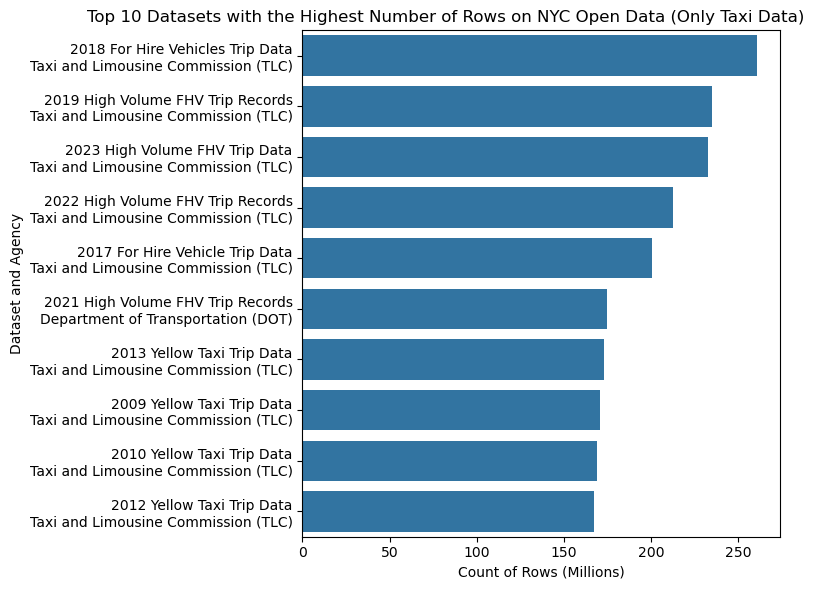

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# include these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

data = (
    df
    .loc[df['name'].str.contains('|'.join(taxi_car_data))]
    .sort_values(by='count_rows', ascending=False)
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)


sns.barplot(
    data=data, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data (Only Taxi Data)',
    fontsize=12, x=.3
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-taxi-data.png', dpi=250, bbox_inches='tight')

# Relationships

In [26]:
df.describe().round(1)

,count_rows,viewCount,downloadCount
count,2551.0,2551.0,2551.0
mean,2338589.3,10864.0,4509.6
std,18097003.3,107109.0,39693.1
min,0.0,49.0,4.0
25%,135.0,361.5,388.0
50%,1393.0,822.0,784.0
75%,12374.5,2536.5,2079.0
max,376404531.0,2806198.0,1612110.0


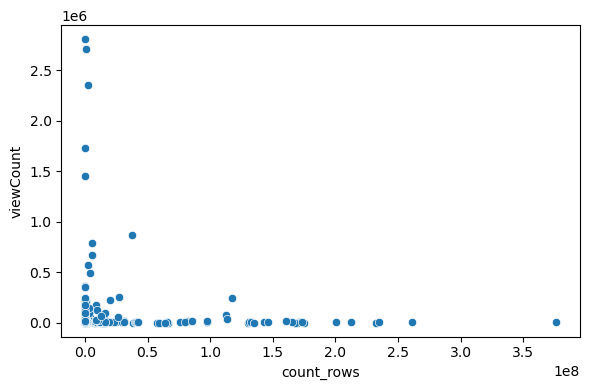

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    data=df,
    x='count_rows',
    y='viewCount',
    ax=ax
)

plt.tight_layout()

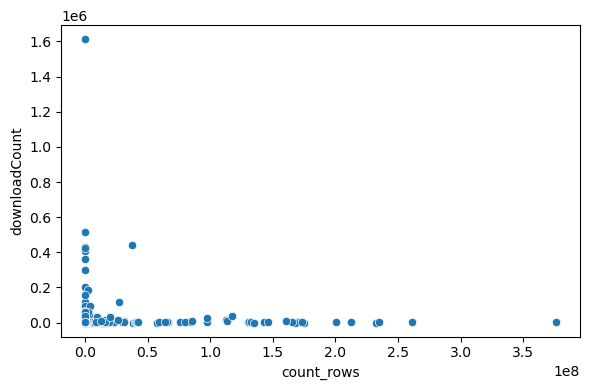

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    data=df,
    x='count_rows',
    y='downloadCount',
    ax=ax
)

plt.tight_layout()

In [30]:
df.loc[df['count_rows'].between(0, 100_000, inclusive='right'), 'sizes'] = '(0, 100_000]'
df.loc[df['count_rows'].between(100_000, 1_000_000, inclusive='right'), 'sizes'] = '(100_000, 1_000_000]'
df.loc[df['count_rows'].between(1_000_000, 100_000_000, inclusive='right'), 'sizes'] = '(1_000_000, 100_000_000]'
df.loc[df['count_rows'] > 100_000_000, 'sizes'] = '> 100_000_000'

In [31]:
df.groupby(by=['sizes'])['count_rows'].describe()

,count,mean,std,min,25%,50%,75%,max
sizes,,,,,,,,
"(0, 100_000]",2166.0,6.830159e+03,1.629008e+04,1.0,1.125000e+02,780.0,3.314500e+03,99815.0
"(100_000, 1_000_000]",171.0,3.950457e+05,2.536786e+05,100107.0,1.804230e+05,315721.0,5.993160e+05,963932.0
"(1_000_000, 100_000_000]",133.0,1.521745e+07,2.197724e+07,1008688.0,2.097150e+06,5546569.0,1.583700e+07,97698569.0
> 100_000_000,22.0,1.754306e+08,6.071688e+07,112234626.0,1.334570e+08,166222834.5,1.938619e+08,376404531.0


(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 100_000]'),
  Text(1, 0, '(100_000, 1_000_000]'),
  Text(2, 0, '(1_000_000, 100_000_000]'),
  Text(3, 0, '> 100_000_000')])

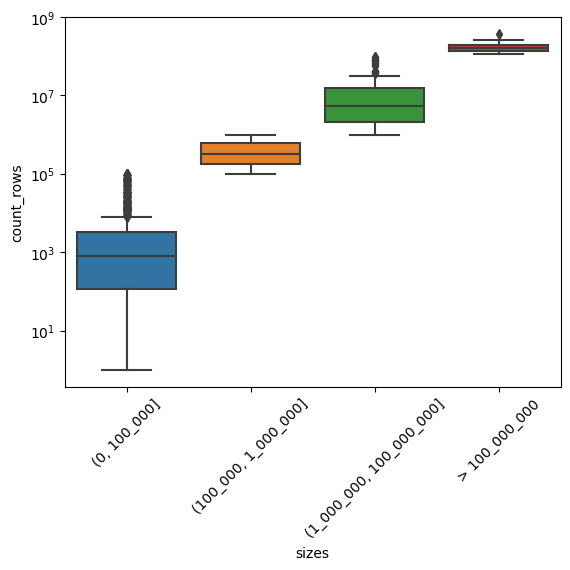

In [32]:
order = [
    '(0, 100_000]',
    '(100_000, 1_000_000]',
    '(1_000_000, 100_000_000]',
    '> 100_000_000',
]
          
sns.boxplot(
    data=df,
    x='sizes',
    y='count_rows',
    order=order
)

plt.yscale('log')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 100_000]'),
  Text(1, 0, '(100_000, 1_000_000]'),
  Text(2, 0, '(1_000_000, 100_000_000]'),
  Text(3, 0, '> 100_000_000')])

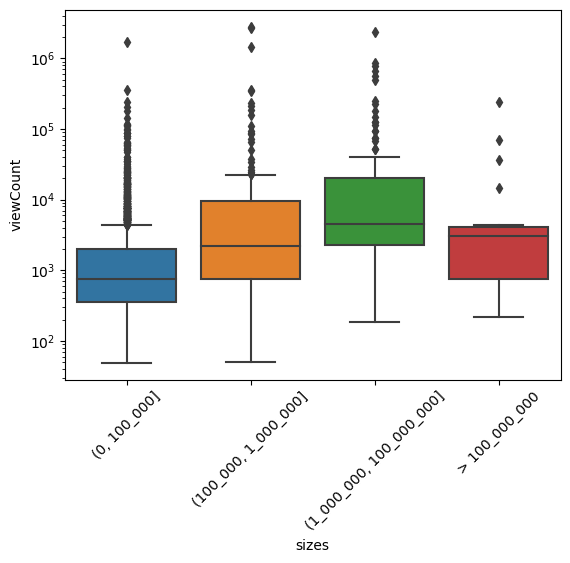

In [33]:
order = [
    '(0, 100_000]',
    '(100_000, 1_000_000]',
    '(1_000_000, 100_000_000]',
    '> 100_000_000',
]

sns.boxplot(data=df, x='sizes', y='viewCount', order=order)

plt.yscale('log')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 100_000]'),
  Text(1, 0, '(100_000, 1_000_000]'),
  Text(2, 0, '(1_000_000, 100_000_000]'),
  Text(3, 0, '> 100_000_000')])

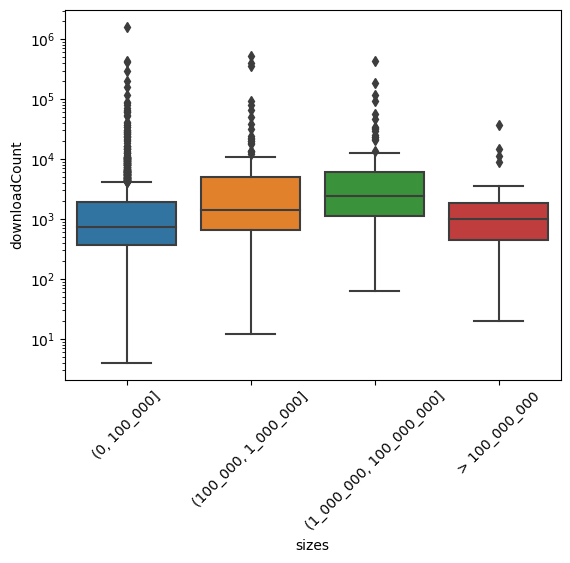

In [34]:
order = [
    '(0, 100_000]',
    '(100_000, 1_000_000]',
    '(1_000_000, 100_000_000]',
    '> 100_000_000',
]

sns.boxplot(data=df, x='sizes', y='downloadCount', order=order)

plt.yscale('log')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 100_000]'),
  Text(1, 0, '(100_000, 1_000_000]'),
  Text(2, 0, '(1_000_000, 100_000_000]'),
  Text(3, 0, '> 100_000_000')])

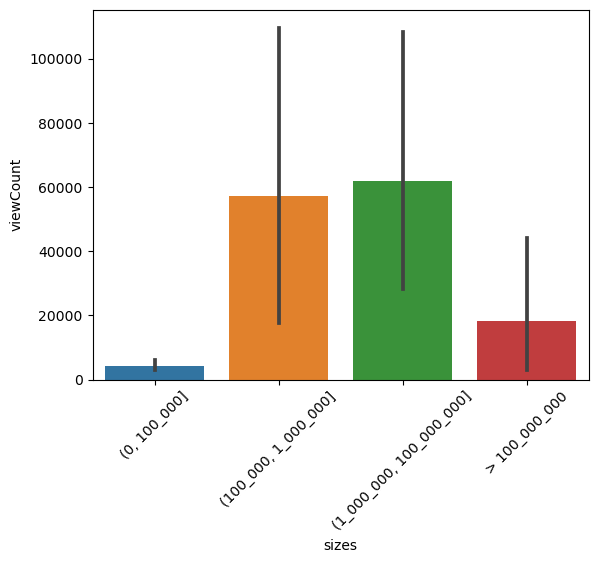

In [35]:
order = [
    '(0, 100_000]',
    '(100_000, 1_000_000]',
    '(1_000_000, 100_000_000]',
    '> 100_000_000',
]

sns.barplot(data=df, x='sizes', y='viewCount', order=order)

plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 100_000]'),
  Text(1, 0, '(100_000, 1_000_000]'),
  Text(2, 0, '(1_000_000, 100_000_000]'),
  Text(3, 0, '> 100_000_000')])

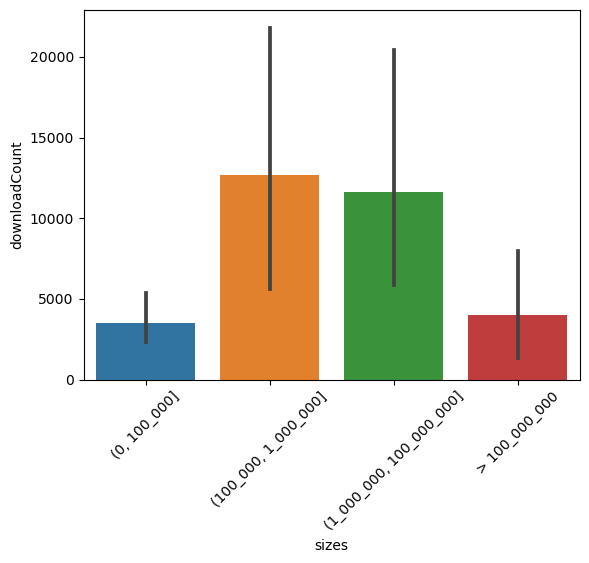

In [36]:
order = [
    '(0, 100_000]',
    '(100_000, 1_000_000]',
    '(1_000_000, 100_000_000]',
    '> 100_000_000',
]

sns.barplot(data=df, x='sizes', y='downloadCount', order=order)

plt.xticks(rotation=45)